In [1]:
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np

import theano
import theano.tensor as T


In [4]:
np.std(XX, axis=0)

array([ 1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

array([ 0.        ,  0.85365791,  0.08259856,  0.61032597,  0.05576471,
        0.46899259,  0.02823782,  0.38502012,  0.        ,  0.46012429,
        1.14564584,  0.79974084,  0.        ,  0.        ,  0.0354692 ])

(40, 12)


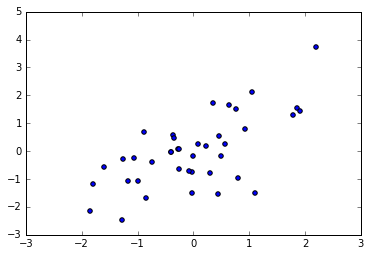

In [2]:
sz = 40
rs = np.random.RandomState(42)
X = rs.randn(sz)
#X = np.hstack([X_[np.where(X_>0)], X_[np.where(X_<0)]])



XX = np.vstack([ X,np.ones(sz), X**2, X**3, X**4, X**5, X**6, X**7, X**8, X**9,  np.cos(X), np.sin(X)])
XX = XX.T

bias =  np.mean(XX, axis=0)
var = (np.std(XX, axis=0))
XX = (XX-bias)/var
XX[:,1] =  np.ones(sz)
print XX.shape
dim = XX.shape[1]


Y = XX[:,0]  + rs.randn(sz)*1.0
plt.scatter(XX[:,0], Y)

In [95]:
W = theano.shared(np.zeros((1,1)))
X_t = T.matrix()
Y_t = T.vector()

cost = T.mean((T.dot(   X_t, W).T - Y_t )**2)
grad = T.grad(cost, W)
up = [(W, W -  10**(-1)*grad)]
f = theano.function([X_t, Y_t], cost, updates= up, on_unused_input='warn')
m = theano.function([X_t, Y_t], cost, on_unused_input='warn')



In [96]:
for _ in xrange(100):
    
    print f(XX[:sz/2,:1], Y[:sz/2]), m(XX[sz/2:,:1], Y[sz/2:])
print W.eval()

1.06290580403 1.81706337865
0.882844363244 1.64725827475
0.767126997032 1.52983963278
0.692760665269 1.44773217346
0.644968778182 1.38963615804
0.614255088034 1.34802823181
0.594516784734 1.31786382268
0.581831867512 1.29573294312
0.573679843374 1.27930941449
0.568440905162 1.26699029662
0.565074075879 1.25765886502
0.562910366562 1.25052803801
0.561519848179 1.24503634808
0.560626224734 1.24077835663
0.560051933254 1.23745774561
0.559682862023 1.23485541676
0.55944567659 1.23280758355
0.559293248211 1.23119056414
0.559195289367 1.22991010432
0.559132335637 1.2288937911
0.559091878114 1.22808559627
0.559065877888 1.22744190395
0.559049168716 1.22692858433
0.559038430485 1.2265188137
0.559031529509 1.22619143358
0.559027094562 1.22592970378
0.559024244422 1.22572034685
0.559022412765 1.22555281039
0.559021235642 1.2254186938
0.559020479159 1.22531130052
0.559019993001 1.22522528647
0.559019680569 1.22515638316
0.559019479783 1.22510117876
0.559019350747 1.22505694459
0.559019267821 1.22

NameError: name 'W' is not defined

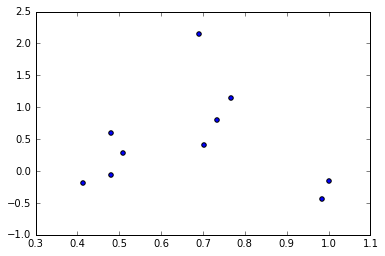

In [3]:
plt.scatter(XX[:sz/2,0 ], Y[:sz/2])
plt.scatter(XX[:sz/2, 0], np.dot(XX[:sz/2, :1] , W.eval()), c='r')
print XX[sz/2:,0]
print Y[sz/2:]

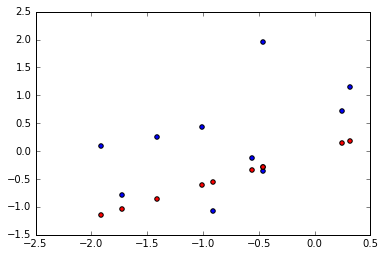

In [309]:
plt.scatter(XX[sz/2:,0 ], Y[:sz/2])
plt.scatter(XX[sz/2:, 0], np.dot(XX[sz/2:, :1] , W.eval()), c='r')


In [13]:
W = theano.shared(np.zeros((dim,1)))
X_t = T.matrix()
Y_t = T.vector()

cost = T.mean((T.dot(   X_t, W).T - Y_t )**2)
grad = T.grad(cost, W)
up = [(W, W -  10**(-1)*grad)]
f = theano.function([X_t, Y_t], cost, updates= up, on_unused_input='warn')
m = theano.function([X_t, Y_t], cost, on_unused_input='warn')

In [14]:
np.mean((np.dot(XX, W.eval()).T -  Y)**2)
XX.mean(axis=0)

array([ 0.49877885,  1.        ,  0.24324924,  0.60018847,  0.15107578,
        0.68091694,  0.11552996,  0.74722758,  0.09554852,  0.79993538,
        0.24235626,  0.45535949,  0.24398298,  0.56273553,  0.44170923])

In [15]:
for i in xrange(1000):
      
    res=  f(XX[:sz/2], Y[:sz/2]), m(XX[sz/2:], Y[sz/2:])
    if i%100 == 0:
        print i, res
W.eval()

0 (array(0.7450836649698513), array(1.219452150177001))
100 (array(0.29222812421533473), array(1.6303776331028317))
200 (array(0.2385420073549362), array(2.3122377874437547))
300 (array(0.2214919729753518), array(2.9120766571025163))
400 (array(0.21457777250230894), array(3.382671181881695))
500 (array(0.2112944032588929), array(3.73954399759049))
600 (array(0.20949019463767798), array(4.009057433993894))
700 (array(0.20832519364206745), array(4.215178402999912))
800 (array(0.20744920765403232), array(4.37660993674535))
900 (array(0.20671266036963004), array(4.507001946209097))


array([[ 1.01523631],
       [ 0.18206664],
       [-1.34188633],
       [-0.53130647],
       [-0.89752512],
       [-0.3537973 ],
       [-0.50551869],
       [-0.14987307],
       [-0.26950336],
       [-0.00888194],
       [-0.20362479],
       [-0.83426943],
       [-0.56525604],
       [-0.31229388],
       [ 2.22423535]])

[[ 1.01523631]
 [ 0.18206664]
 [-1.34188633]
 [-0.53130647]
 [-0.89752512]
 [-0.3537973 ]
 [-0.50551869]
 [-0.14987307]
 [-0.26950336]
 [-0.00888194]
 [-0.20362479]
 [-0.83426943]
 [-0.56525604]
 [-0.31229388]
 [ 2.22423535]]


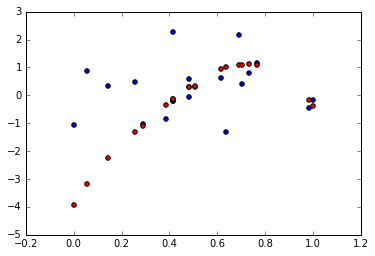

In [18]:
print W.eval()
plt.scatter(XX[:,0], Y)
plt.scatter(XX[:,0], np.dot(XX, W.eval()), c='r')


[[1.015236310488183], [0.18206663557502625], [-1.3418863286669727], [-0.531306471849201], [-0.8975251191907162], [-0.35379730196526593], [-0.5055186935905474], [-0.14987306958541574], [-0.2695033632075346], [-0.008881940276900693], [-0.20362478805713358], [-0.8342694303107847], [-0.5652560379070967], [-0.312293878403576], [2.2242353537882873]]


(-2, 2)

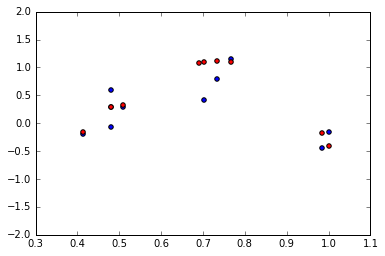

In [23]:
print W.eval().tolist()
plt.scatter(XX[:sz/2,0], Y[:sz/2])
plt.scatter(XX[:sz/2, 0], np.dot(XX[:sz/2], W.eval()), c='r')
plt.ylim((-2,2))

[[ 1.01523631]
 [ 0.18206664]
 [-1.34188633]
 [-0.53130647]
 [-0.89752512]
 [-0.3537973 ]
 [-0.50551869]
 [-0.14987307]
 [-0.26950336]
 [-0.00888194]
 [-0.20362479]
 [-0.83426943]
 [-0.56525604]
 [-0.31229388]
 [ 2.22423535]]


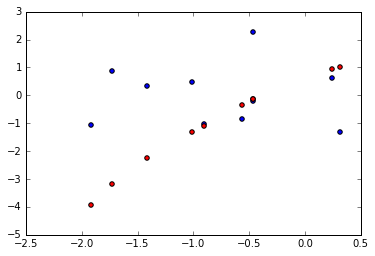

In [292]:
print W.eval()
plt.scatter(X[sz/2:], Y[sz/2:])
plt.scatter(X[sz/2:], np.dot(XX[sz/2:], W.eval()), c='r')


In [92]:
np.save('linear2_x', XX)
np.save('linear2_y', Y)
np.save('linear2_bias_var', [bias, var])

In [93]:
print np.linalg.lstsq(XX[:sz/2],Y[:sz/2])[0].tolist(), 


[-111473033.36722681, -3.822011359035969, 7048428.999576522, 47842369.20789098, -1992383.070291426, -7735654.807677854, 233418.8139658682, 638894.238774661, -14136.439025238156, -29842.29005979374, 5363581.321789765, 76455949.83176447]


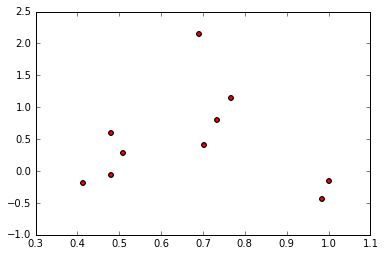

In [47]:
plt.scatter(XX[:sz/2,0], np.dot(XX[:sz/2] , np.linalg.lstsq(XX[:sz/2],Y[:sz/2])[0]))
plt.scatter(XX[:sz/2,0], Y[:sz/2], c='r')

In [77]:
np.dot(XX[:sz/2] , np.linalg.lstsq(XX[:sz/2],Y[:sz/2])[0])

array([ 0.44187494,  0.08314906,  0.64770096,  2.42132856, -0.56549411,
       -0.565435  ,  3.05634838,  0.61452143, -0.83138291,  0.52804205,
       -0.83124298, -0.83131604,  0.01244401, -0.6208827 , -1.51998563,
       -0.8140806 , -0.36639417,  0.05802462, -0.45800394, -1.5931245 ,
        1.76176201, -0.53377007,  1.51441676, -1.66041525, -0.8201958 ,
        0.71737819, -0.46391361,  0.17334739, -0.7963902 , -0.71480608,
       -0.79580583,  2.24636424, -0.9597861 , -0.36311122,  0.53773556,
       -0.6539337 ,  0.05526991, -1.75080725, -1.1314763 ,  0.08603519,
        0.63996559,  0.18680287,  0.38129912, -0.73070147, -1.92485895,
       -0.69942063, -0.83112268,  0.02305205,  0.10802056, -1.16144012])

In [105]:
X = np.arange(-2, 2, 0.1)
XX2 = np.vstack([ X,np.ones(X.shape[0]), X**2, X**3, X**4, X**5, X**6, X**7, X**8, X**9,  np.exp(X), abs(X)**(0.5), abs(X)**(-1), np.log(abs(X)), np.sin(X)])
XX2 = XX2.T
XX2 = (XX2-bias)/var
XX2[:,1] =  np.ones(X.shape[0])


ValueError: operands could not be broadcast together with shapes (40,15) (12,) 

In [62]:
print XX[0,:]
print XX2[25,:]

[  6.90049874e-01   1.00000000e+00   6.25034781e-02   6.51272179e-01
   4.51552687e-03   7.23867027e-01   3.06031178e-04   7.93086714e-01
   2.06351640e-05   8.49037195e-01   3.17998196e-01   3.29195936e-01
   2.22145803e-01   4.86733671e-01   7.36722379e-01]
[  6.90990706e-01   1.00000000e+00   6.34028405e-02   6.51495919e-01
   4.63693044e-03   7.23895606e-01   3.18386271e-04   7.93089692e-01
   2.17528661e-05   8.49037473e-01   3.19148086e-01   3.31497036e-01
   2.20174028e-01   4.89243134e-01   7.38174101e-01]


In [72]:
XX.std(axis=0)

array([ 1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.])

In [100]:
from sklearn.linear_model import SGDRegressor

In [125]:
cl = SGDRegressor( learning_rate='constant', eta0=2.5*0.01, n_iter=1000000)
cl.fit(XX[:20], Y[:20])
print np.sqrt(np.mean((cl.predict(XX[:20])-Y[:20])**2))
print np.sqrt(np.mean((cl.predict(XX[20:])-Y[20:])**2))

0.651795392191
1.54153567875
